# Advanced regression Assignment on House Price Prediction
### Submitted By: Nistha Kumar
### Submitted On: 2nd Nov,2020

In [1]:
#Importing all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

#Importing the lasso and ridge regressions
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
# reading the dataset
house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Doing routine check
# summary of the dataset: 1460 rows, 81 columns
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Exploratory Data Analysis

In [4]:
cat_cols= house.select_dtypes(include=['object']).columns
print("cat_cols:",cat_cols)
cont_cols = house.select_dtypes(exclude=['object']).columns
print("cont_cols:",cont_cols)

cat_cols: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
cont_cols: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBa

In [5]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#### Observation - information on some variables(min-max values, skewness determination)
* **`ID`**: numerical(continuous) variable with lowest id being 1 and highest value of id being 1460.
* **`MSSubclass`**,**`Overallqual`**,**`OverallCond`**: categorical, ordinal.
* **`LotFrontage`**: numerical (continuous), quantitative. Min LotFrontage in the dataset being 21  and max experience being 313. Range of Q1 to Q3 is between 59 to 80. Since the mean is almost similar to median, we can say that Lot Frontage is normally distributed.
* **`LotArea`**: numerical (continuous), quantitative. Min LotArea in the dataset being 1300 while the maximum being 215245. Range of Q1 to Q3 is between 7553 to 11601. Since the mean is gretaer than median, we can say that LotArea is right(positively) skewed.
* **`MasVnrArea`**: numerical(continuous).75% of data values are around 166 whereas the maximum value being 1600. MassVnrArea is highly skewed towards right.

In [6]:
#converting to correct datatype for some variables
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')

In [7]:
#Checking categorical and continuous columns again
cat_cols= house.select_dtypes(include=['object'])
print("cat_cols:",cat_cols.columns)
cont_cols = house.select_dtypes(exclude=['object'])
print("cont_cols:",cont_cols.columns)

cat_cols: Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')
cont_cols: Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'B

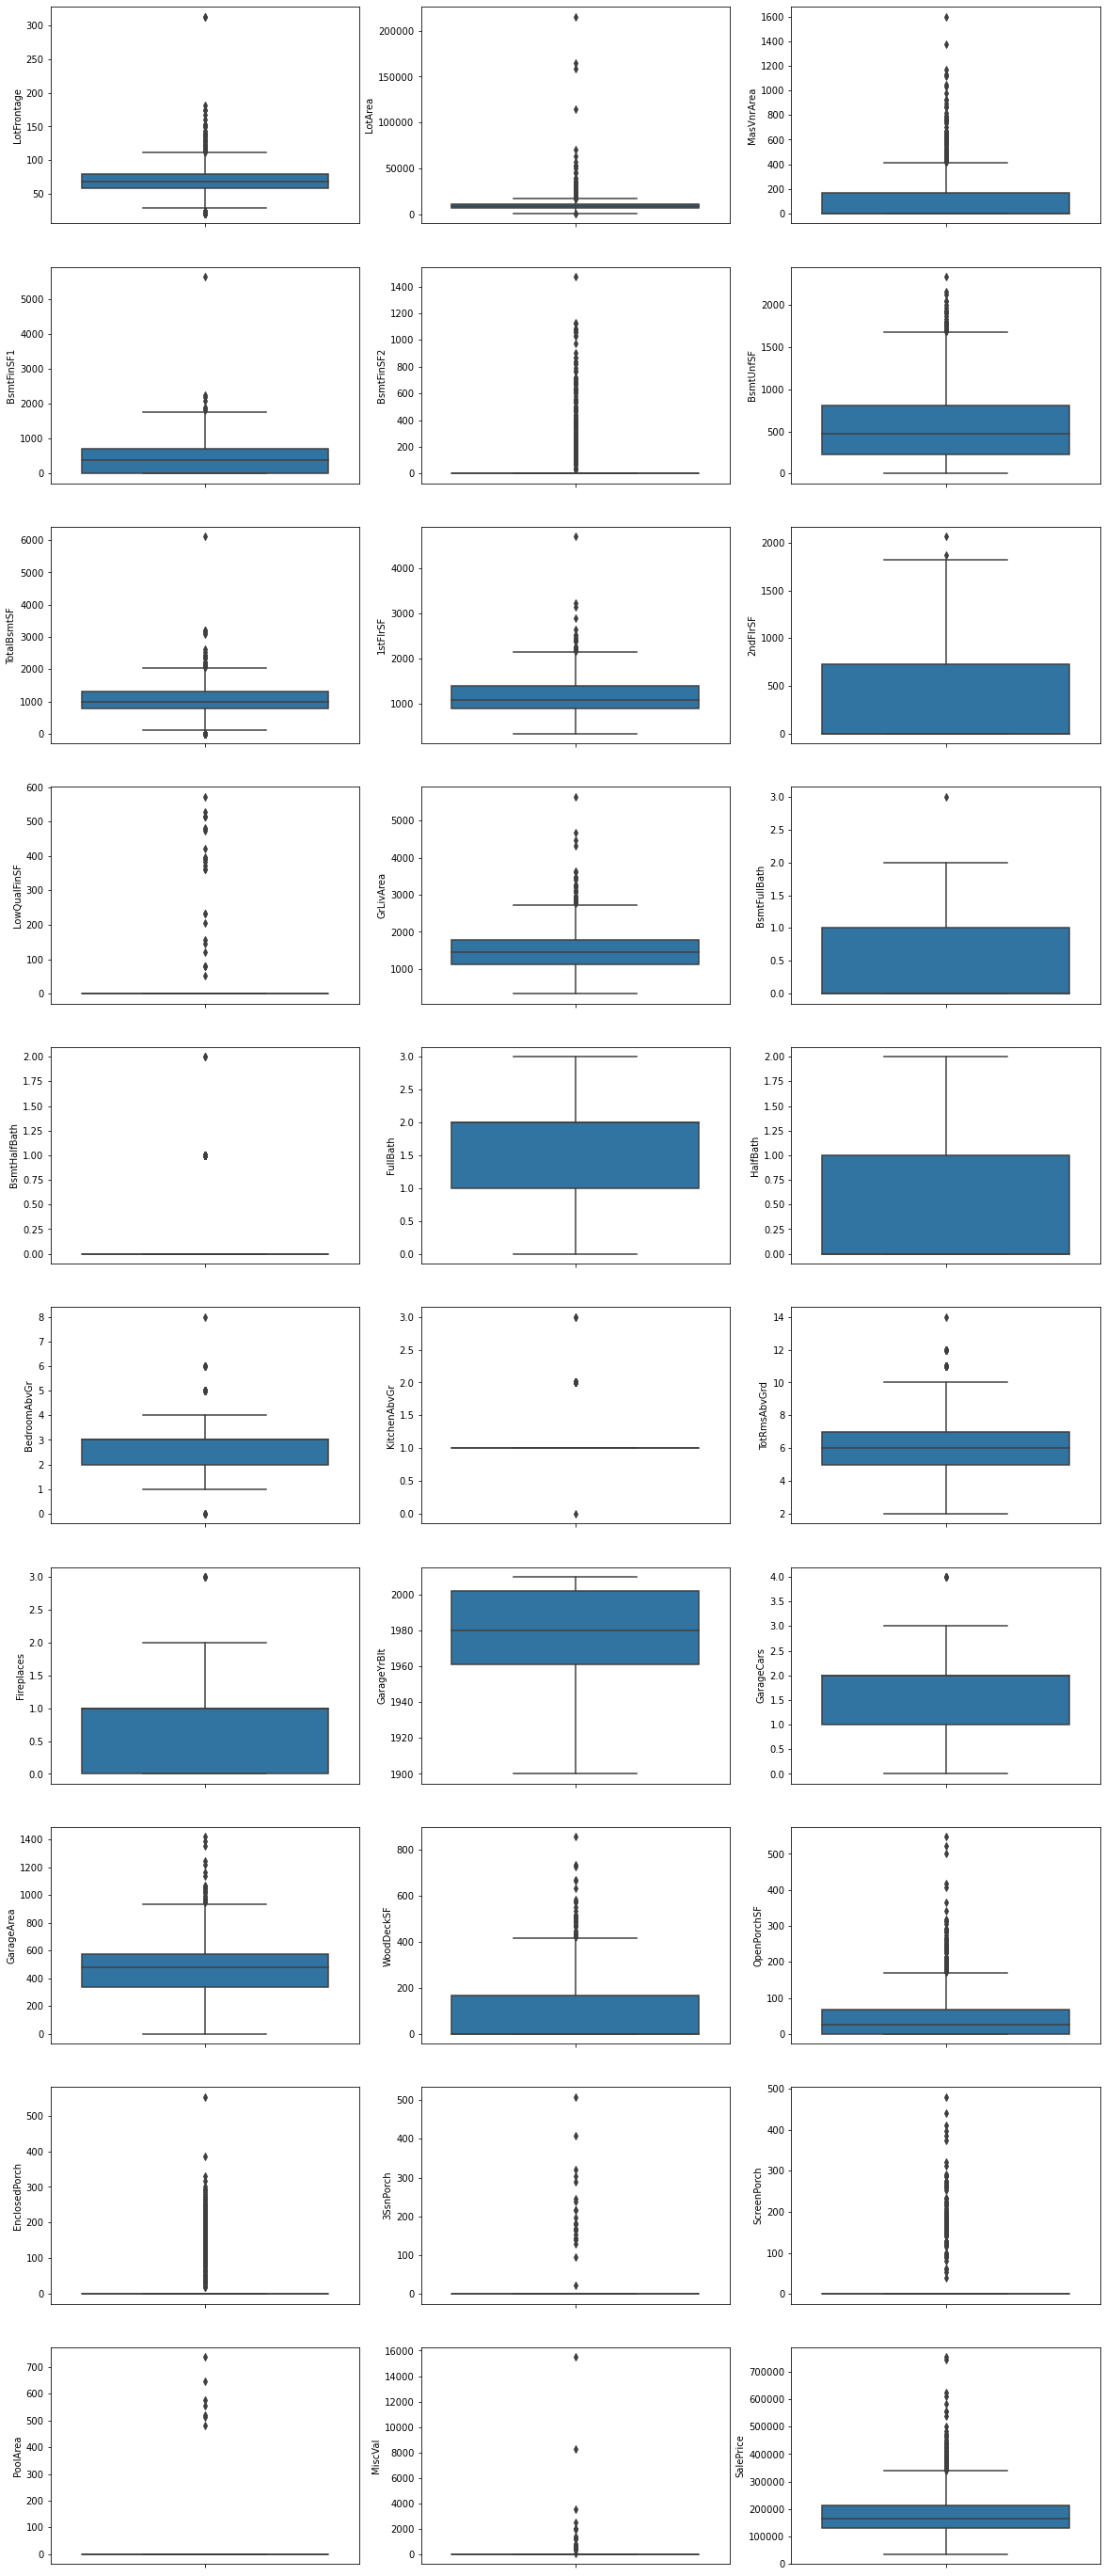

In [8]:
#Selecting some numerical columns for visualisation
num_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal','SalePrice']
plt.figure(figsize=(20,50))
for colind in range(0,len(num_cols)):
    plt.subplot(10,3,colind+1)
    sns.boxplot(y=house[num_cols[colind]])
plt.show()

##### Observations
- SalePrice has a long right tail, but that's obvious - we would have some very high priced houses - we cannot eliminate these very important data points - so we would try power tranforming this column
- Many other X variables also have outliers

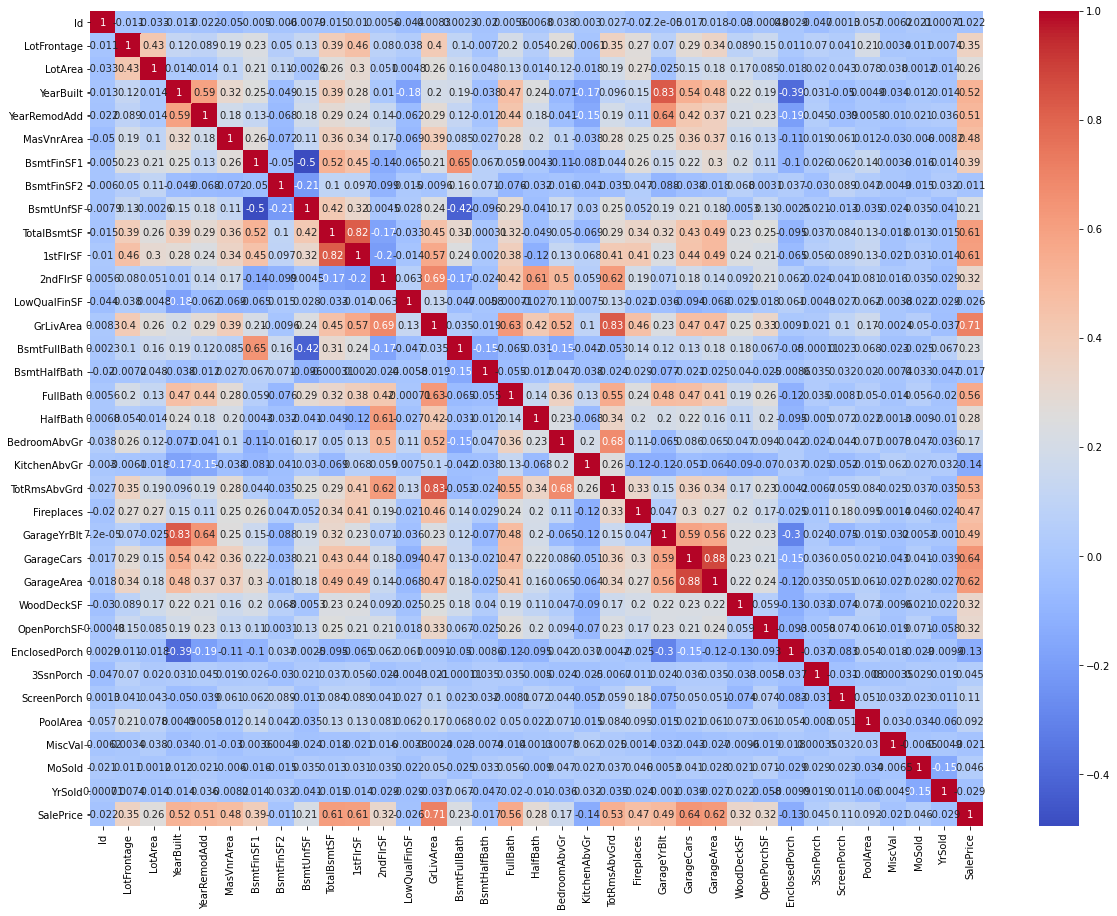

In [9]:
# plotting a heatmap
plt.figure(figsize = (20, 15))
# heatmap
sns.heatmap(cont_cols.corr(), cmap="coolwarm", annot=True)
plt.show()

###### Observations
Instances of heavy correlation can be deleted (>0.8 for instance)
- GarageCars can be removed as it is correlated by 0.88 with GarageArea
- TotRmsAbvGrd can be removed as it is correlated by 0.83 with GrLivArea

In [10]:
# let's remove them
del_col2 = ['GarageCars','TotRmsAbvGrd']
house.drop(del_col2,axis=1,inplace=True)
cont_cols = [i for i in cont_cols if i not in del_col2]
print(cont_cols)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


<Figure size 2880x2160 with 0 Axes>

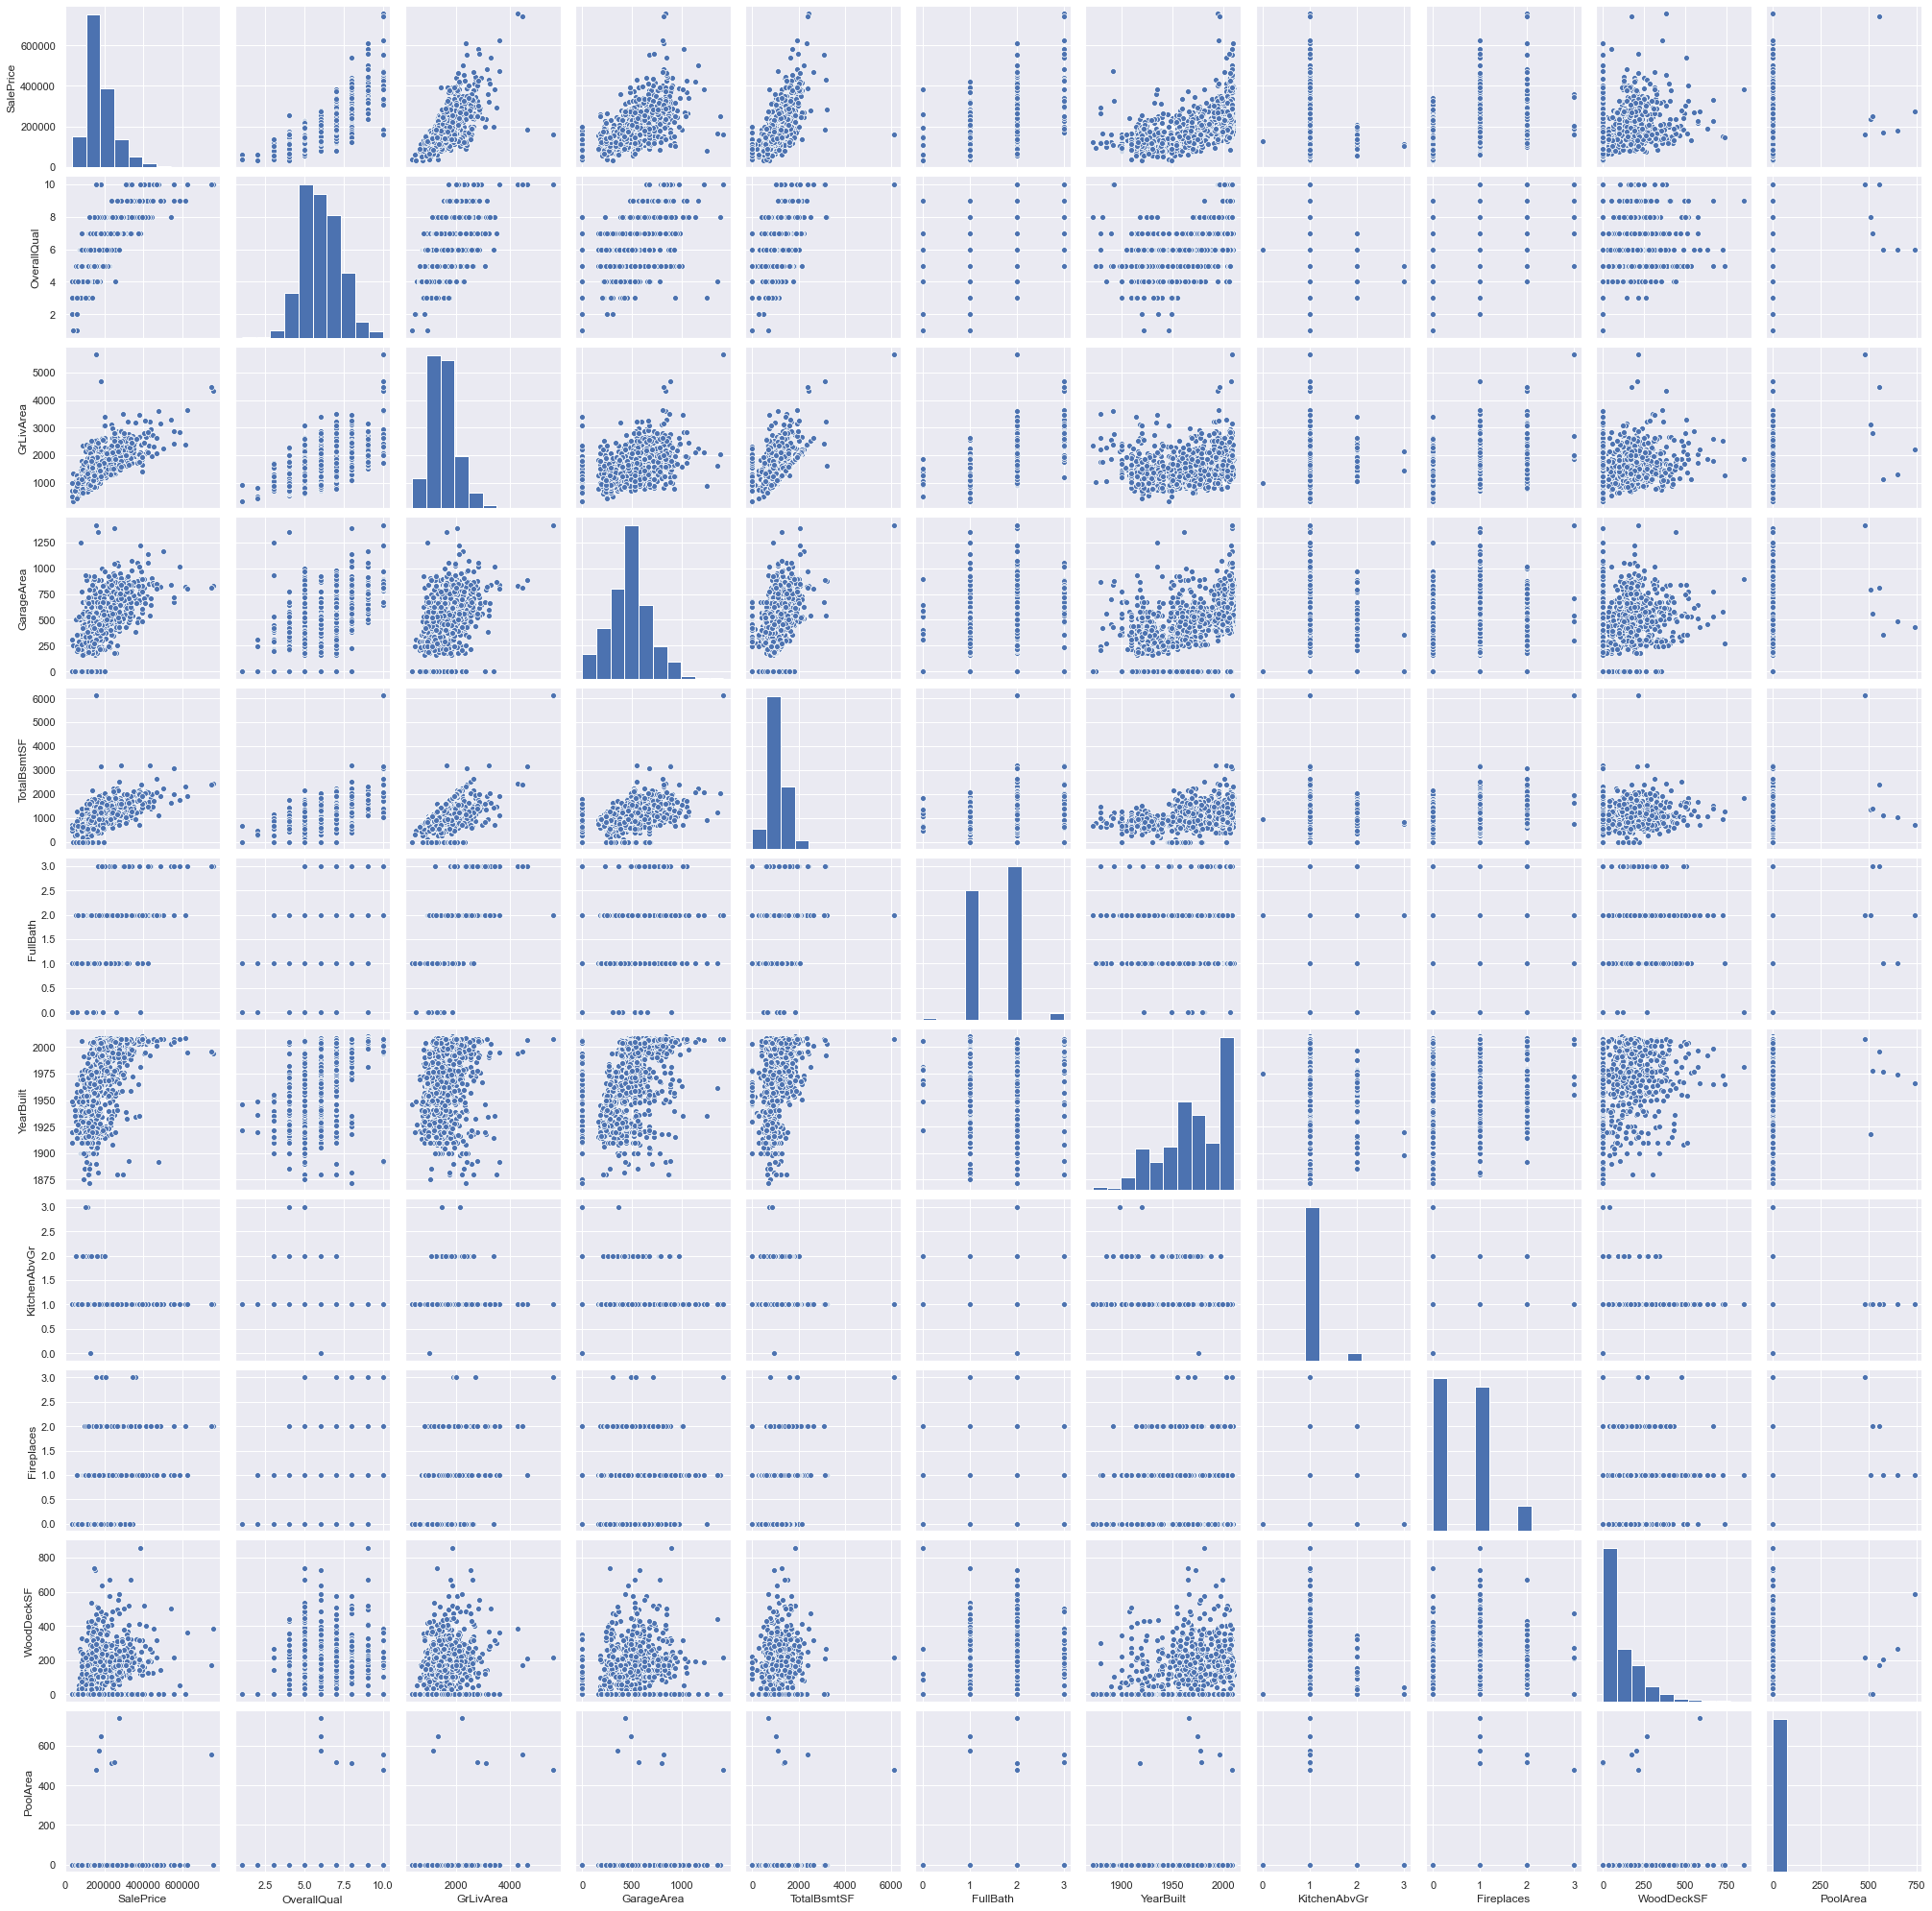

In [11]:
#plotting scatter plot for some of the numeric variables
sns.set()
plt.figure(figsize=(40, 30))
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt',
        'KitchenAbvGr','Fireplaces','WoodDeckSF','PoolArea']
sns.pairplot(house[cols], size = 2.5)
plt.show();

###### Observations
-We can see GrLiveArea, GarageArea, TotalBsmtSF, YearBuilt and WoodDeckSF have good linear relationship with the SalePrice.

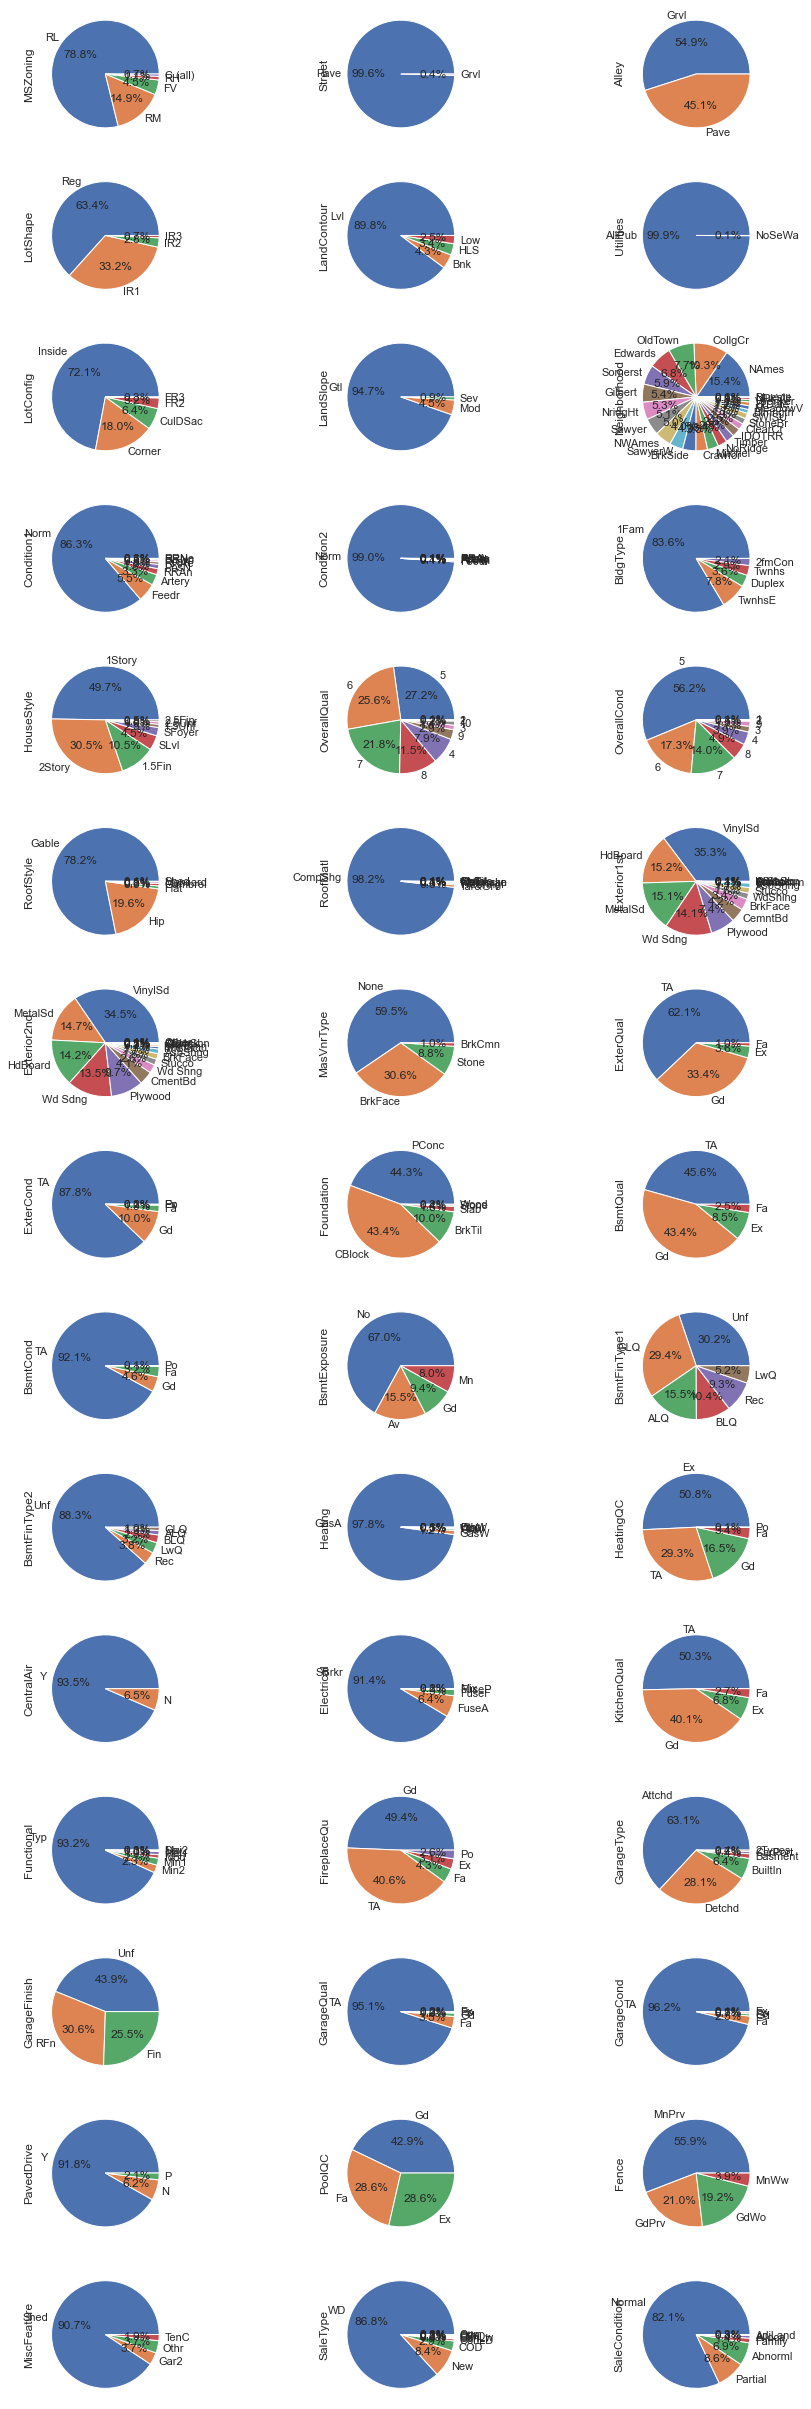

In [12]:
#Lets check categorical columns
plt.figure(figsize=(15,50))
for colind in range(1,len(cat_cols.columns)):
    plt.subplot(17,3,colind)
    house[cat_cols.columns[colind]].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

###### Observations
-There are some heavily skewed columns: "Street", "Alley", "Utilities", "LandSlope", "Condition2", "RoofMatl", "Heating",  "Functional", "GarageCond", "PoolQC", "PavedDrive", "MiscFeature", "CentralAir", "Electrical", "LandContour", "Condition1", "BldgType", "RoofStyle", "ExterCond", "BsmtCond", "BsmtFinType2", "GarageQual", "Fence", "SaleType","SaleCondition".
 Keeping these wouldnt actually help in model building much as it would be biased. Thus dropping them would be a good option.

In [13]:
#Dropping highly skewed columns
skewed_cols=["Street", "Alley", "Utilities", "LandSlope", "Condition2", "RoofMatl", "Heating",  "Functional", "GarageCond", "PoolQC", "PavedDrive", "MiscFeature", "CentralAir", "Electrical", "LandContour", "Condition1", "BldgType", "RoofStyle", "ExterCond", "BsmtCond", "BsmtFinType2", "GarageQual", "Fence", "SaleType","SaleCondition"]
house.drop(skewed_cols,axis=1,inplace=True)

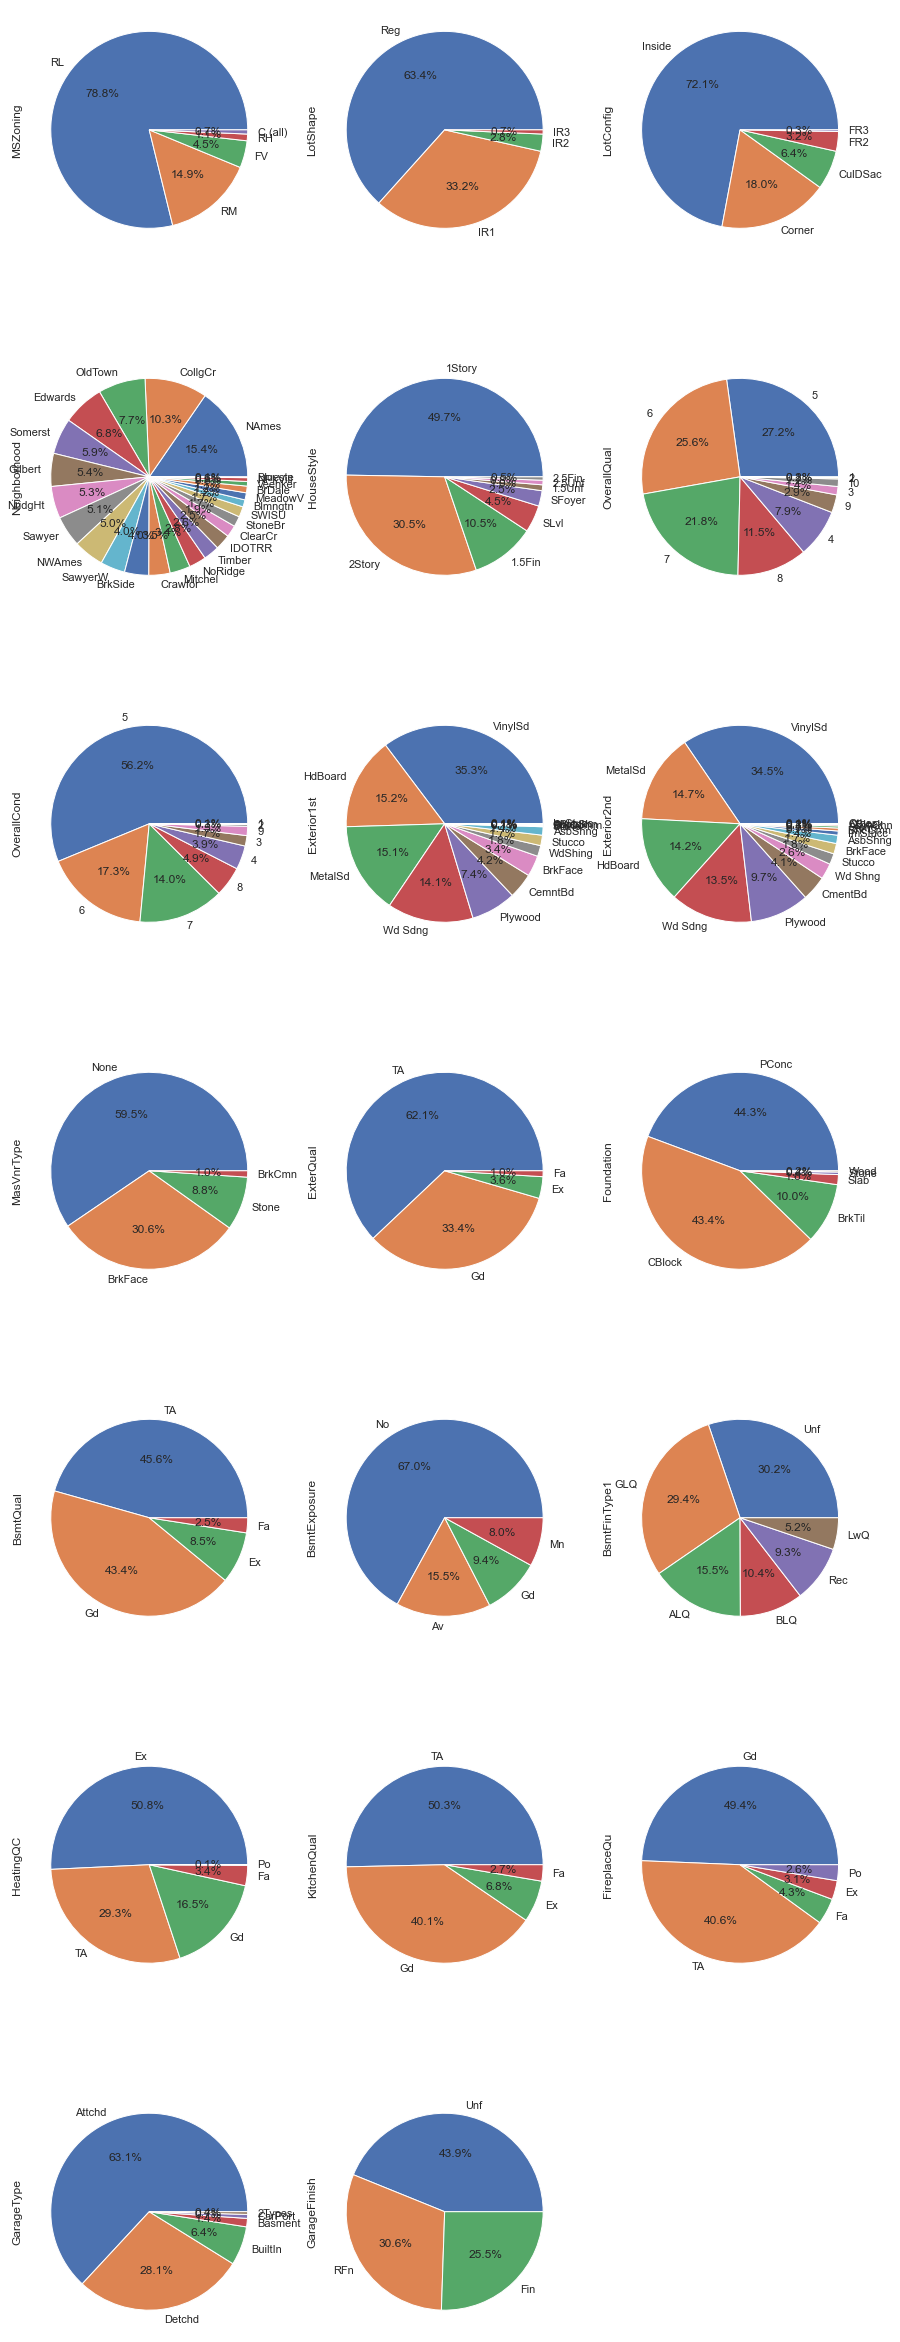

In [14]:
#Checking if heavily skewed columns are removed or not
cat_cols= house.select_dtypes(include=['object']).columns
plt.figure(figsize=(15,50))
for colind in range(1,len(cat_cols)):
    #print(house[cat_cols[colind]])
    plt.subplot(8,3,colind)
    house[cat_cols[colind]].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

## Missing Value Treatment

In [15]:
#lets loook at the missing value in the dataset
round(100*house.isnull().sum()/len(house.index),2).sort_values(ascending=False)

FireplaceQu      47.26
LotFrontage      17.74
GarageFinish      5.55
GarageYrBlt       5.55
GarageType        5.55
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
YearRemodAdd      0.00
BsmtFinSF1        0.00
Foundation        0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
SalePrice         0.00
YearBuilt         0.00
OverallCond       0.00
BsmtUnfSF         0.00
OverallQual       0.00
HouseStyle        0.00
Neighborhood      0.00
LotConfig         0.00
LotShape          0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF2        0.00
HeatingQC         0.00
TotalBsmtSF       0.00
YrSold            0.00
MoSold            0.00
MiscVal           0.00
PoolArea          0.00
ScreenPorch       0.00
3SsnPorch         0.00
EnclosedPorch     0.00
OpenPorchSF       0.00
WoodDeckSF        0.00
GarageArea        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvG

In [16]:
# based on data dictionary NA in FireplaceQu means 'No Fireplace'
house.loc[house['FireplaceQu'].isnull(),['FireplaceQu']] = 'No Fireplace'

# based on data dictionary NA in BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 means 'No Basement'
house.loc[house['BsmtQual'].isnull(),['BsmtQual']] = 'No Basement'
house.loc[house['BsmtExposure'].isnull(),['BsmtExposure']] = 'No Basement'
house.loc[house['BsmtFinType1'].isnull(),['BsmtFinType1']] = 'No Basement'


# based on data dictionary NA in GarageType,GarageFinish,GarageQual,GarageCond means 'No Garage'
house.loc[house['GarageType'].isnull(),['GarageType']] = 'No Garage'
house.loc[house['GarageFinish'].isnull(),['GarageFinish']] = 'No Garage'

# based on data dictionary NA in MasVnrType means 'none'
house.loc[house['MasVnrType'].isnull(),['MasVnrType']] = 'none'
# based on data dictionary where MasVnrType type is 'none' area will 0
house.loc[house['MasVnrArea'].isnull(),['MasVnrArea']] = 0

In [17]:
#lets ook how many columns still have null vlues
house.columns[100*house.isnull().sum()/len(house.index)>0]

Index(['LotFrontage', 'GarageYrBlt'], dtype='object')

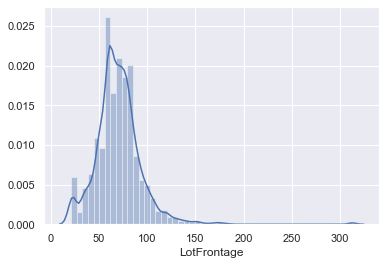

In [18]:
sns.distplot(house['LotFrontage'],hist='False')

In [19]:
house['LotFrontage'].skew()

2.163569142324884

In [20]:
#replacing the missing values with median
house["LotFrontage"].replace(np.nan, house["LotFrontage"].median(),inplace=True)

In [21]:
# null value in GarageYrBlt can indicate no garage
# impute GarageYrBlt with 2020 so that while calculating age it will it will turn to 0
# age = 2020-2020 = 0
house.loc[house['GarageYrBlt'].isnull(),['GarageYrBlt']] = 2020

In [22]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   object 
 10  OverallCond    1460 non-null   object 
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  Exterior1st    1460 non-null   object 
 14  Exterior2nd    1460 non-null   object 
 15  MasVnrType     1460 non-null   object 
 16  MasVnrArea     1460 non-null   float64
 17  ExterQual      1460 non-null   object 
 18  Foundati

### Derived Columns

In [23]:
##Derived variables from the dataset
#New variable creation TotalSF i.e combination of TotalBsmtSF, 1stFlrSF, 2ndFlrSF
house['TotalSF'] = house['TotalBsmtSF'] + house['1stFlrSF'] + house['2ndFlrSF']
#house["house_age_when_sold_in_month"] = (((house["YrSold"]-1) - house["YearBuilt"])*12) + house["MoSold"]
# derive house age = 2020 - year build
house["house_age"] = 2020 - house["YearBuilt"]
# derive garage age = 2020 - year build
house["garage_age"] = 2020 - house["GarageYrBlt"]
# derive gap b/w house build and remodel = YearRemodAdd - year build
house["gap_between_build_remodel"] = house["YearRemodAdd"] - house["YearBuilt"]

In [24]:
house['YrSold'] = house['YrSold'].astype('object')
house['MoSold'] = house['MoSold'].astype('object')

In [25]:
# We can drop "YearBuilt" and "GarageYrBlt" now as we already have the age now
house.drop(["YearBuilt","GarageYrBlt"],axis=1,inplace=True)

In [26]:
#Lets again look at numerical columns
cont_cols = house.select_dtypes(exclude=['object'])
print(cont_cols.columns)

Index(['Id', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'TotalSF',
       'house_age', 'garage_age', 'gap_between_build_remodel'],
      dtype='object')


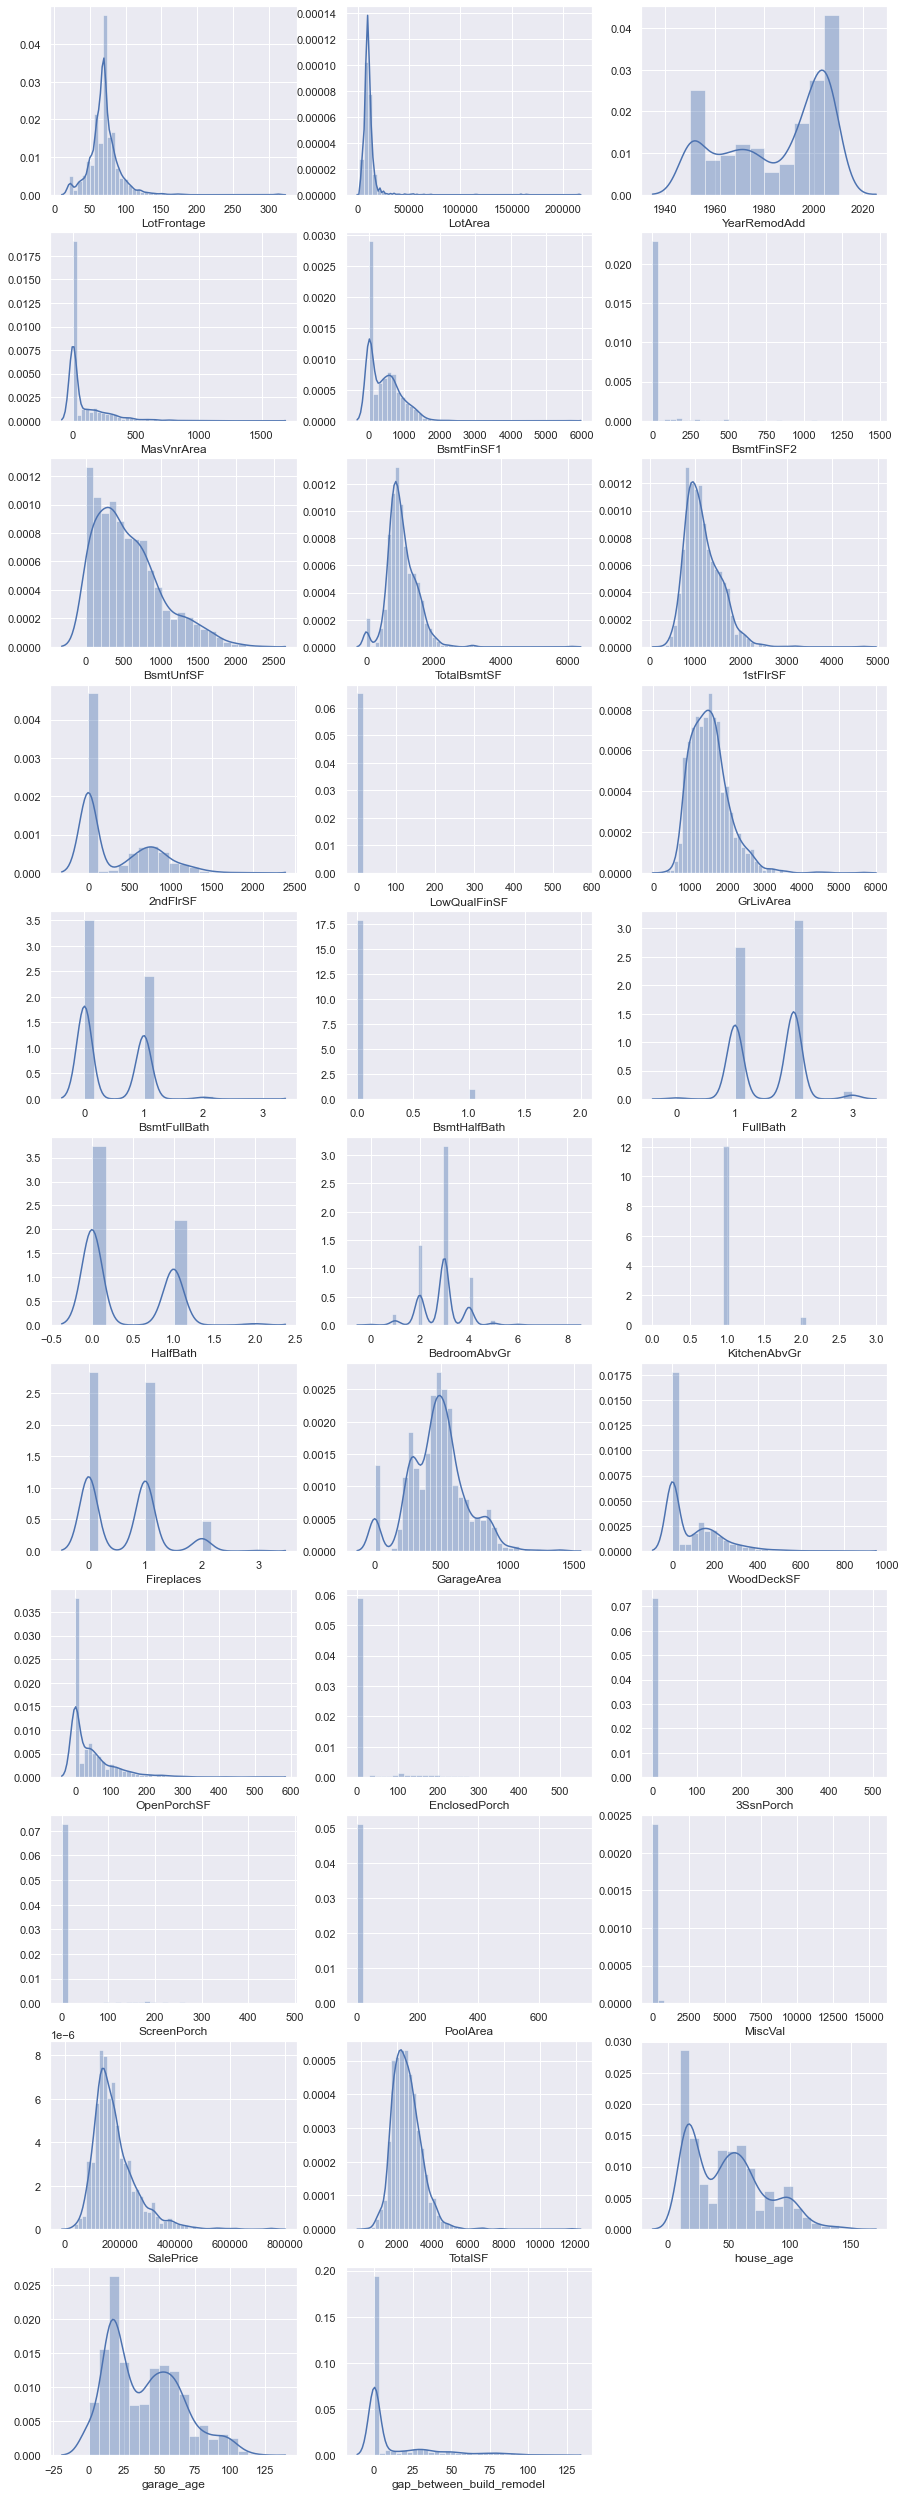

In [27]:
#lets plot distplot for all the numeric columns to observe there distribution and remove the redundant ones
plt.figure(figsize=(15,70))
for colind in range(1,len(cont_cols.columns)):
    plt.subplot(17,3,colind)
    sns.distplot(house[cont_cols.columns[colind]])
plt.show()

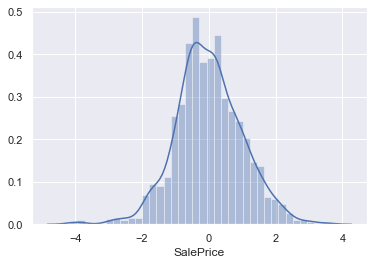

In [28]:
#Transforming the target vaiable to make it normally distributed
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=True)
house['SalePrice']=pt.fit_transform(house['SalePrice'].values.reshape(-1,1))
sns.distplot(house['SalePrice'],hist='False')

In [29]:
#These are the columns form the above distplot that doesnot follow normal distribution, lets drop few of them
#'YrSold','YearRemodAdd','MoSold','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','Fireplaces','GarageCars'
house.drop(["Id","YearRemodAdd","Fireplaces"], axis=1,inplace=True)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF,house_age,garage_age,gap_between_build_remodel
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,No Fireplace,Attchd,RFn,548,0,61,0,0,0,0,0,2,2008,0.571155,2566,17,17.0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,TA,Attchd,RFn,460,298,0,0,0,0,0,0,5,2007,0.227627,2524,44,44.0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,TA,Attchd,RFn,608,0,42,0,0,0,0,0,9,2008,0.741869,2706,19,19.0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,Gd,Detchd,Unf,642,0,35,272,0,0,0,0,2,2006,-0.425386,2473,105,22.0,55
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,TA,Attchd,RFn,836,192,84,0,0,0,0,0,12,2008,1.015293,3343,20,20.0,0


In [30]:
house.shape

(1460, 53)

## Outlier Treatment

In [31]:
house['LotFrontage']=pt.fit_transform(house['LotFrontage'].values.reshape(-1,1))
house['LotArea']=pt.fit_transform(house['LotArea'].values.reshape(-1,1))
house['PoolArea']=pt.fit_transform(house['PoolArea'].values.reshape(-1,1))
house['MiscVal']=pt.fit_transform(house['MiscVal'].values.reshape(-1,1))

In [32]:
house.shape

(1460, 53)

## Data Prearation

In [33]:
#lets include the categorical columns
cat_cols=house.select_dtypes(include=['object'])
print(cat_cols.columns)

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'MoSold', 'YrSold'],
      dtype='object')


In [34]:
house['Neighborhood'].value_counts(normalize=True,dropna=False)

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
Blmngtn    0.011644
MeadowV    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

In [35]:
house['Neighborhood'] = house['Neighborhood'].apply(lambda x:x if x not in ['SawyerW','BrkSide','Crawfor','Mitchel','NoRidge','Timber','IDOTRR','ClearCr','SWISU','StoneBr','MeadowV','Blmngtn','BrDale','Veenker','NPkVill','Blueste']
                                                                     else 'Other')
house['Neighborhood'].value_counts(normalize=True,dropna=False)

Other      0.330822
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
Name: Neighborhood, dtype: float64

In [36]:
house['Exterior1st'].value_counts(normalize=True,dropna=False)

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
Stone      0.001370
BrkComm    0.001370
CBlock     0.000685
AsphShn    0.000685
ImStucc    0.000685
Name: Exterior1st, dtype: float64

In [37]:
house['Exterior1st'] = house['Exterior1st'].apply(lambda x:x if x not in ['Brkface','CemntBd','WdShing','Stucco','AsbShng','BrkComm','Stone','CBlock','ImStucc','AsphShn']
                                                                     else 'Other')
house['Exterior1st'].value_counts(normalize=True,dropna=False)

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Other      0.095205
Plywood    0.073973
BrkFace    0.034247
Name: Exterior1st, dtype: float64

In [38]:
house['Exterior2nd'].value_counts(normalize=True,dropna=False)

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
CBlock     0.000685
Other      0.000685
Name: Exterior2nd, dtype: float64

In [39]:
house['Exterior2nd'] = house['Exterior2nd'].apply(lambda x:x if x not in ['CmentBd','Wd Shng','BrkFace','Stucco','AsbShng','ImStucc','Brk Cmn','Stone','CBlock','AsphShn']
                                                                     else 'Other')
house['Exterior2nd'].value_counts(normalize=True,dropna=False)

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Other      0.134247
Plywood    0.097260
Name: Exterior2nd, dtype: float64

In [40]:
house['MSSubClass'].value_counts(normalize=True,dropna=False)

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

In [41]:
house['MSSubClass'] = house['MSSubClass'].apply(lambda x:x if x not in [40,180,45,75,85,160,190,90]
                                                                     else 'Other')
house['MSSubClass'].value_counts(normalize=True,dropna=False)

20       0.367123
60       0.204795
Other    0.141781
50       0.098630
120      0.059589
30       0.047260
70       0.041096
80       0.039726
Name: MSSubClass, dtype: float64

In [42]:
# split into X and y
X = house.drop(['SalePrice'], axis=1)
y = house['SalePrice']

In [43]:
#lets include the categorical columns
house_categorical_df=X.select_dtypes(include=['object'])
print(house_categorical_df.columns)

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'MoSold', 'YrSold'],
      dtype='object')


In [44]:
#creating dummy variables for categorical columns
house_df_dummies = pd.get_dummies(house_categorical_df, drop_first=True)
house_df_dummies.head()

,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_120,MSSubClass_Other,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_Somerst,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [45]:
# dropping the original categorical variables after creating dummies
X = X.drop(list(house_categorical_df.columns), axis=1)

In [46]:
# concat dummy variables with X
X = pd.concat([X, house_df_dummies], axis=1)

In [47]:
X.shape

(1460, 153)

In [48]:
X.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF,house_age,garage_age,gap_between_build_remodel,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_120,MSSubClass_Other,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_Somerst,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
count,1.460000e+03,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000

## Model Building

In [49]:
# split data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, 
                                                    test_size = 0.3, 
                                                    random_state = 100)

In [50]:
#scaling X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_var = X.select_dtypes(exclude=['object']).columns
X_train[scale_var] = scaler.fit_transform(X_train[scale_var])

In [51]:
# scaling X_test
X_test[scale_var] = scaler.transform(X_test[scale_var])

In [52]:
#Feature Selection using RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lm = LinearRegression()
lm.fit(X_train, y_train)

#Lets build a linear regression model first and then apply RFE
print("Train:",r2_score(y_train, lm.predict(X_train)))
print("Test:",r2_score(y_test, lm.predict(X_test)))
from sklearn.feature_selection import RFE
rfe = RFE(lm, 80)             # running RFE with 25 variables as output
rfe.fit(X_train, y_train)
RFE_cols = list(X_train.columns[rfe.support_])
print(RFE_cols)
print("Train:",r2_score(y_train, rfe.predict(X_train)))
print("Test:",r2_score(y_test, rfe.predict(X_test)))

Train: 0.9203668031993428
Test: -7.044576550627045e+18
['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'GarageArea', 'PoolArea', 'TotalSF', 'house_age', 'gap_between_build_remodel', 'MSSubClass_30', 'MSSubClass_50', 'MSSubClass_70', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Ext

###  Building model using Lasso

In [53]:
X_train_lasso=X_train[RFE_cols]
X_test_lasso=X_test[RFE_cols]
#X_train_lasso=X_train
#X_test_lasso=X_test
# lasso regression without tuning hyper parameter
lm = Lasso(alpha=0.001)
lm.fit(X_train_lasso, y_train)

# predict
y_train_pred = lm.predict(X_train_lasso)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_lasso)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9090742905871932
0.8596093943700128


In [54]:
# Now let's do k fold with r2 score and tune hyper parameter
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}

model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train_lasso, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             return_train_score=True, scoring='r2', verbose=1)

In [55]:
# results data frame 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.092554,0.007287,0.005387,0.001018,0.0001,{'alpha': 0.0001},0.848902,0.865300,0.896905,0.699554,0.878529,0.837838,0.070914,1,0.913664,0.918011,0.911193,0.925805,0.910620,0.915859,0.005614
1,0.049268,0.009804,0.004491,0.000628,0.001,{'alpha': 0.001},0.845120,0.869127,0.896274,0.693739,0.876253,0.836103,0.073037,2,0.912116,0.915737,0.909358,0.924288,0.909616,0.914223,0.005531
2,0.017153,0.002033,0.004589,0.000488,0.01,{'alpha': 0.01},0.830792,0.860786,0.877589,0.687463,0.859992,0.823324,0.069579,3,0.896086,0.900195,0.893360,0.909960,0.896219,0.899164,0.005822
3,0.009975,0.001093,0.005583,0.001199,0.05,{'alpha': 0.05},0.819076,0.848113,0.828859,0.619700,0.809278,0.785005,0.083644,4,0.839726,0.843123,0.846480,0.864980,0.836978,0.846257,0.009891
4,0.007181,0.000977,0.004188,0.000399,0.1,{'alpha': 0.1},0.782189,0.798777,0.786667,0.576643,0.743664,0.737588,0.082562,5,0.768229,0.771884,0.781737,0.807999,0.769684,0.779906,0.014817


In [56]:
model_cv.best_params_

{'alpha': 0.0001}

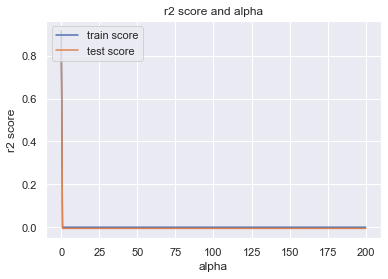

In [57]:
#plotting the values of r2 score to choose the optimal value of alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
#plt.yscale('log')
#plt.xscale('log')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [58]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.076345,0.004222,0.004587,0.000487,0.0001,{'alpha': 0.0001},-0.246808,-0.237701,-0.203784,-0.216890,-0.254970,-0.232031,0.018994,2,-0.196818,-0.196572,-0.209602,-0.188835,-0.199408,-0.198247,0.006689
1,0.047575,0.010504,0.004091,0.001284,0.001,{'alpha': 0.001},-0.250680,-0.235661,-0.204096,-0.216916,-0.251637,-0.231798,0.018729,1,-0.197619,-0.197267,-0.209827,-0.190503,-0.198124,-0.198668,0.006238
2,0.013563,0.001621,0.003991,0.000629,0.01,{'alpha': 0.01},-0.253530,-0.242726,-0.212285,-0.215157,-0.250705,-0.234880,0.017660,3,-0.205480,-0.204789,-0.217431,-0.202040,-0.206411,-0.207230,0.005305
3,0.008177,0.001323,0.004190,0.000398,0.05,{'alpha': 0.05},-0.291178,-0.262759,-0.248314,-0.253023,-0.305869,-0.272229,0.022455,4,-0.257324,-0.253344,-0.256870,-0.249786,-0.258821,-0.255229,0.003261
4,0.006781,0.000746,0.002993,0.000001,0.1,{'alpha': 0.1},-0.337080,-0.314792,-0.283009,-0.291233,-0.373316,-0.319886,0.032733,5,-0.311853,-0.308370,-0.312466,-0.304429,-0.308865,-0.309197,0.002873


In [60]:
model_cv.best_params_

{'alpha': 0.001}

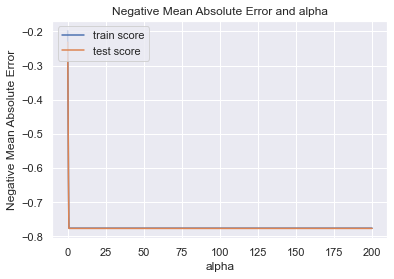

In [61]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [62]:
# model with optimal alpha = 0.001
lm_lasso = Lasso(alpha=0.001)
lm_lasso.fit(X_train_lasso, y_train)


# predict
y_train_pred = lm_lasso.predict(X_train_lasso)
print("Train:",r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm_lasso.predict(X_test_lasso)
print("Test:",r2_score(y_true=y_test, y_pred=y_test_pred))

Train: 0.9090742905871932
Test: 0.8596093943700128


In [63]:
# lasso model parameters with alpha = 0.001
model_parameters = list(lm_lasso.coef_)
model_parameters.insert(0, lm_lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_lasso.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
final_var=dict(zip(cols, model_parameters))
{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

{'house_age': -0.216,
 'Neighborhood_Edwards': -0.076,
 'FireplaceQu_No Fireplace': -0.074,
 'BsmtFinType1_Unf': -0.07,
 'MSSubClass_30': -0.066,
 'Exterior1st_HdBoard': -0.066,
 'KitchenQual_TA': -0.066,
 'BsmtQual_Gd': -0.061,
 'Exterior1st_MetalSd': -0.059,
 'Exterior1st_Other': -0.059,
 'Exterior1st_Wd Sdng': -0.059,
 'Exterior1st_VinylSd': -0.056,
 'BsmtQual_TA': -0.055,
 'PoolArea': -0.053,
 'OverallQual_2': -0.05,
 'OverallCond_3': -0.05,
 'KitchenQual_Gd': -0.05,
 'Exterior1st_Plywood': -0.042,
 'Neighborhood_NAmes': -0.041,
 'Neighborhood_OldTown': -0.04,
 'Neighborhood_Sawyer': -0.038,
 'BsmtExposure_No Basement': -0.038,
 'KitchenQual_Fa': -0.038,
 'KitchenAbvGr': -0.034,
 'BsmtQual_No Basement': -0.034,
 'GarageFinish_Unf': -0.033,
 'LotShape_IR3': -0.03,
 'Neighborhood_NWAmes': -0.027,
 'OverallQual_4': -0.017,
 'OverallQual_3': -0.015,
 'OverallCond_4': -0.014,
 'LowQualFinSF': -0.011,
 'constant': -0.004,
 'BsmtFinSF2': -0.001,
 'BsmtFinSF1': -0.0,
 'TotalBsmtSF': 0.0,
 

In [64]:
# Finding the coefficient for Lasso regression model
lasso_coef = pd.DataFrame({"Variable":X_train_lasso.columns,"Coeff":lm_lasso.coef_})
lasso_coef["AbsCoeff"] = round(lasso_coef["Coeff"].abs(),4)
lasso_coef.sort_values(by="AbsCoeff",ascending=False)

,Variable,Coeff,AbsCoeff
24,MSZoning_RL,0.389675,0.3897
25,MSZoning_RM,0.288388,0.2884
8,GrLivArea,0.287705,0.2877
17,house_age,-0.215843,0.2158
22,MSZoning_FV,0.194985,0.1950
42,OverallQual_8,0.171010,0.1710
43,OverallQual_9,0.129469,0.1295
0,LotArea,0.121287,0.1213
41,OverallQual_7,0.117534,0.1175
73,GarageType_Attchd,0.116455,0.1165


### Top 10 columns and their coefficients:

- MSZoning_RL	 :       0.3897	
- MSZoning_RM	 :       0.2884	
- GrLivArea	 :      0.2877
- house_age	 :       -0.2158
- MSZoning_FV	 :       0.1950
- OverallQual_8      :      0.1710
- OverallQual_9  :       0.1295
- LotArea    :       0.1213
- OverallQual_7       :       0.1175
- GarageType_Attchd :       0.1165

### Building model using Ridge

In [65]:
# ridge regression without tuning hyper parameter
lm = Ridge(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9203662533656566
0.8599717619099798


In [66]:
# Now let's do k fold with r2 score and tune hyper parameter
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [67]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010773,0.001166,0.005384,0.000490,0.001,{'alpha': 0.001},0.851627,0.782050,0.842462,0.871113,0.908935,0.851237,0.041444,1,0.925834,0.933881,0.930775,0.922048,0.915824,0.925672,0.006381
1,0.009375,0.000798,0.005984,0.001261,0.01,{'alpha': 0.01},0.851630,0.782029,0.842484,0.871112,0.908924,0.851236,0.041447,2,0.925834,0.933881,0.930775,0.922048,0.915824,0.925672,0.006381
2,0.007580,0.001739,0.004787,0.000747,1,{'alpha': 1.0},0.852431,0.779925,0.843618,0.872174,0.907705,0.851171,0.041885,3,0.925666,0.933659,0.930460,0.921943,0.915621,0.925470,0.006347
3,0.046276,0.077097,0.003790,0.000747,5,{'alpha': 5.0},0.857107,0.774209,0.842918,0.877522,0.903863,0.851124,0.043583,4,0.924354,0.932389,0.928745,0.920835,0.914444,0.924153,0.006233
4,0.006583,0.000489,0.003989,0.000631,10,{'alpha': 10.0},0.861387,0.770029,0.841779,0.880884,0.901124,0.851041,0.045066,5,0.922809,0.931205,0.927246,0.919392,0.913396,0.922810,0.006172


In [68]:
model_cv.best_params_

{'alpha': 0.001}

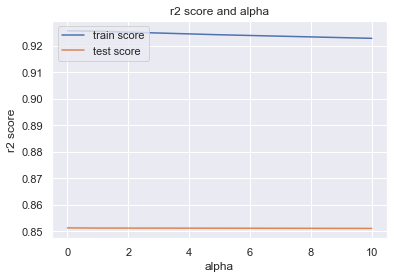

In [69]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [70]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008772,0.002038,0.004300,0.000747,0.001,{'alpha': 0.001},-0.260023,-0.242708,-0.252600,-0.251987,-0.228622,-0.247188,0.010787,5,-0.194783,-0.178416,-0.186445,-0.197430,-0.200581,-0.191531,0.008064
1,0.008778,0.001317,0.004183,0.001157,0.01,{'alpha': 0.01},-0.260004,-0.242708,-0.252586,-0.251978,-0.228612,-0.247178,0.010784,4,-0.194786,-0.178417,-0.186439,-0.197429,-0.200581,-0.191530,0.008065
2,0.009579,0.001848,0.004382,0.001195,1,{'alpha': 1.0},-0.259006,-0.243330,-0.251925,-0.250219,-0.228139,-0.246524,0.010458,3,-0.195237,-0.178567,-0.186309,-0.197432,-0.200669,-0.191643,0.008091
3,0.009973,0.001259,0.004386,0.001014,5,{'alpha': 5.0},-0.256178,-0.247266,-0.252322,-0.244672,-0.227586,-0.245605,0.009851,2,-0.196337,-0.179564,-0.186499,-0.197947,-0.201572,-0.192384,0.008124
4,0.008575,0.001018,0.005189,0.001162,10,{'alpha': 10.0},-0.253673,-0.249855,-0.251489,-0.242661,-0.227521,-0.245040,0.009507,1,-0.197417,-0.180755,-0.186827,-0.198581,-0.202163,-0.193149,0.008032


In [72]:
model_cv.best_params_

{'alpha': 10.0}

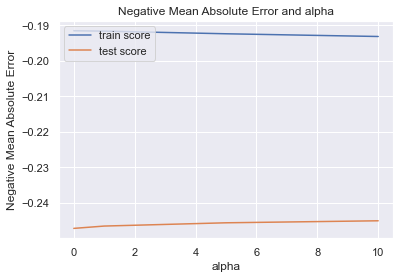

In [73]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [74]:
# model with optimal alpha = 10
# ridge regression
lm_ridge = Ridge(alpha=10)
lm_ridge.fit(X_train, y_train)
y_train_pred = lm_ridge.predict(X_train)
print("Train:",r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm_ridge.predict(X_test)
print("Test:",r2_score(y_true=y_test, y_pred=y_test_pred))
from sklearn.metrics import mean_absolute_error
print("Mean-Absolute Error for train:", mean_absolute_error(y_train,y_train_pred))
print("Mean-Absolute Error for test:", mean_absolute_error(y_test,y_test_pred))

Train: 0.9179129133807673
Test: 0.8578914073072987
Mean-Absolute Error for train: 0.19726080613613572
Mean-Absolute Error for test: 0.2507858648629583


In [75]:
# Ridge model parameters with alpha = 10
model_parameters = list(lm_ridge.coef_)
model_parameters.insert(0, lm_ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
final_var=dict(zip(cols, model_parameters))
{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

{'house_age': -0.162,
 'Exterior1st_MetalSd': -0.089,
 'BsmtQual_TA': -0.088,
 'BsmtQual_Gd': -0.08,
 'BsmtFinType1_Unf': -0.079,
 'FireplaceQu_No Fireplace': -0.074,
 'Exterior1st_HdBoard': -0.07,
 'Neighborhood_Edwards': -0.067,
 'Exterior1st_VinylSd': -0.066,
 'Exterior1st_Other': -0.065,
 'Exterior1st_Wd Sdng': -0.065,
 'KitchenQual_TA': -0.063,
 'MSSubClass_30': -0.058,
 'OverallQual_2': -0.058,
 'KitchenQual_Gd': -0.056,
 'OverallCond_3': -0.051,
 'PoolArea': -0.049,
 'GarageFinish_Unf': -0.047,
 'OverallQual_5': -0.043,
 'OverallQual_4': -0.042,
 'BsmtQual_No Basement': -0.035,
 'BsmtFinType1_No Basement': -0.035,
 'Exterior1st_Plywood': -0.034,
 'BsmtExposure_No Basement': -0.031,
 'KitchenQual_Fa': -0.031,
 'KitchenAbvGr': -0.03,
 'Neighborhood_OldTown': -0.03,
 'Neighborhood_Sawyer': -0.029,
 'HouseStyle_2Story': -0.029,
 'OverallQual_3': -0.029,
 'ExterQual_Fa': -0.029,
 'YrSold_2009': -0.029,
 'Neighborhood_NAmes': -0.028,
 'BsmtQual_Fa': -0.027,
 'BsmtExposure_No': -0.027,

In [76]:
ridge_coef = pd.DataFrame({"Variable":X_train.columns,"Coeff":lm_ridge.coef_})
ridge_coef["AbsCoeff"] = round(ridge_coef["Coeff"].abs(),4)
ridge_coef.sort_values(by="AbsCoeff",ascending=False)

,Variable,Coeff,AbsCoeff
38,MSZoning_RL,0.278270,0.2783
39,MSZoning_RM,0.194130,0.1941
26,house_age,-0.162418,0.1624
36,MSZoning_FV,0.143383,0.1434
10,GrLivArea,0.132900,0.1329
69,OverallQual_8,0.126689,0.1267
1,LotArea,0.116363,0.1164
8,2ndFlrSF,0.110790,0.1108
129,GarageType_Attchd,0.103782,0.1038
70,OverallQual_9,0.097295,0.0973


### Top 10 columns and their coefficients:

- MSZoning_RL	 :       0.2783	
- MSZoning_RM	 :       0.1941	
- house_age	 :      0.1624
- MSZoning_FV	 :       0.1434
- GrLivArea	 :       0.1329
- OverallQual_8      :      0.1267
- LotArea  :       0.1164
- 2ndFlrSF    :       0.1108
- GarageType_Attchd       :       0.1038
- OverallQual_9 :       0.0973

### Final Scores
#### Lasso Scores were (alpha = 0.001)
- Train: 0.9090742905871932
- Test: 0.8596093943700128

#### Ridge Scores were (alpha = 10)
- Train: 0.9179129133807673
- Test: 0.8578914073072987

# Best model seems to be "Lasso Scores were (alpha = 0.001)"

### Top columns and their coefficients:

- MSZoning_RL	 :       0.3897	
- MSZoning_RM	 :       0.2884	
- GrLivArea	 :      0.2877
- house_age	 :       -0.2158
- MSZoning_FV	 :       0.1950
- OverallQual_8      :      0.1710
- OverallQual_9  :       0.1295
- LotArea    :       0.1213
- OverallQual_7       :       0.1175
- GarageType_Attchd :       0.1165

# Subjective Questions

### Question 1

#### Optimal value of alpha for:
- Ridge regression: 10
- Lasso Regression: 0.001

In [77]:
#Doubling the value of alpha for Lasso:
#alpha= 0.002
lm_lasso=Lasso(alpha=0.002)
lm_lasso.fit(X_train_lasso, y_train)
# predict
y_train_pred = lm_lasso.predict(X_train_lasso)
print("Train:",r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm_lasso.predict(X_test_lasso)
print("Test:",r2_score(y_true=y_test, y_pred=y_test_pred))

Train: 0.906898697276295
Test: 0.8585181764394925


In [78]:
lasso_coef = pd.DataFrame({"Variable":X_train_lasso.columns,"Coeff":lm_lasso.coef_})
lasso_coef["AbsCoeff"] = round(lasso_coef["Coeff"].abs(),4)
lasso_coef.sort_values(by="AbsCoeff",ascending=False)

,Variable,Coeff,AbsCoeff
24,MSZoning_RL,3.156500e-01,0.3156
8,GrLivArea,2.691916e-01,0.2692
25,MSZoning_RM,2.223480e-01,0.2223
17,house_age,-2.071674e-01,0.2072
22,MSZoning_FV,1.571870e-01,0.1572
42,OverallQual_8,1.381013e-01,0.1381
0,LotArea,1.185736e-01,0.1186
43,OverallQual_9,1.140619e-01,0.1141
23,MSZoning_RH,8.996461e-02,0.0900
50,OverallCond_7,8.182816e-02,0.0818


In [79]:
# Doubling the value of alpha for Ridge:
# alpha = 20
lm_ridge=Ridge(alpha=20)
lm_ridge.fit(X_train, y_train)
# predict
y_train_pred = lm_ridge.predict(X_train)
print("Train:",r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm_ridge.predict(X_test)
print("Test:",r2_score(y_true=y_test, y_pred=y_test_pred))
print("Mean-Absolute Error for train:", mean_absolute_error(y_train,y_train_pred))
print("Mean-Absolute Error for test:", mean_absolute_error(y_test,y_test_pred))

Train: 0.9161770971590342
Test: 0.8562994470211804
Mean-Absolute Error for train: 0.1982207075006637
Mean-Absolute Error for test: 0.2509331970085725


In [80]:
ridge_coef = pd.DataFrame({"Variable":X_train.columns,"Coeff":lm_ridge.coef_})
ridge_coef["AbsCoeff"] = round(ridge_coef["Coeff"].abs(),4)
ridge_coef.sort_values(by="AbsCoeff",ascending=False)

,Variable,Coeff,AbsCoeff
38,MSZoning_RL,0.201177,0.2012
26,house_age,-0.147684,0.1477
10,GrLivArea,0.127488,0.1275
39,MSZoning_RM,0.126035,0.1260
69,OverallQual_8,0.116102,0.1161
1,LotArea,0.112708,0.1127
36,MSZoning_FV,0.104390,0.1044
8,2ndFlrSF,0.101540,0.1015
70,OverallQual_9,0.093194,0.0932
106,BsmtQual_TA,-0.081249,0.0812


### Question 3

In [81]:
#Lets build the model by dropping top 5 variables
X_train_lasso= X_train_lasso.drop(['MSZoning_RL','MSZoning_RM', 'GrLivArea','house_age','MSZoning_FV'],axis=1)
X_test_lasso= X_test_lasso.drop(['MSZoning_RL','MSZoning_RM', 'GrLivArea','house_age','MSZoning_FV'],axis=1)
#print(X_train_lasso.head())
lm_lasso=Lasso(alpha=0.001)
lm_lasso.fit(X_train_lasso, y_train)
# predict
y_train_pred = lm_lasso.predict(X_train_lasso)
print("Train:",r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm_lasso.predict(X_test_lasso)
print("Test:",r2_score(y_true=y_test, y_pred=y_test_pred))

Train: 0.8969331728563121
Test: 0.844434468815809


In [82]:
lasso_coef = pd.DataFrame({"Variable":X_train_lasso.columns,"Coeff":lm_lasso.coef_})
lasso_coef["AbsCoeff"] = round(lasso_coef["Coeff"].abs(),4)
lasso_coef.sort_values(by="AbsCoeff",ascending=False)

,Variable,Coeff,AbsCoeff
6,2ndFlrSF,1.921566e-01,0.1922
5,1stFlrSF,1.855009e-01,0.1855
37,OverallQual_8,1.782115e-01,0.1782
68,GarageType_Attchd,1.620972e-01,0.1621
38,OverallQual_9,1.408393e-01,0.1408
0,LotArea,1.270662e-01,0.1271
36,OverallQual_7,1.260785e-01,0.1261
71,GarageType_Detchd,1.191102e-01,0.1191
10,FullBath,1.037066e-01,0.1037
66,KitchenQual_TA,-1.020814e-01,0.1021
